In [1]:
import pandas as pd

# Healthcare Spending Analysis by Region

## Introduction
This project analyzes healthcare spending trends across different U.S. regions using data from CMS.gov
The goal is to identify trends in total spending, per capita costs, and growth rates.

### Key Questions Addressed:
- Which regions have the highest healthcare costs?
- How have healthcare costs grown over time?
- How does Medicare vs. Medicaid spending compare?
- Is there a correlation between population size and spending?
- What are the trends in private health insurance spending?

## Data Cleaning
The datasets contained missing values and columns that were not necessary for our analysis. 
In this section, we perform the following steps:
- Remove the `State_Name` column as it was not useful for regional analysis.
- Fill missing values in key columns.
- Save cleaned datasets for further analysis.

## Exploratory Data Analysis (EDA)
In this section, we explore the healthcare spending data to answer key questions.
We analyze trends, identify growth patterns, and visualize healthcare expenditures by region.

Analysis Performed:
- Total healthcare spending by region
- Growth trends in healthcare spending
- Comparison of Medicare and Medicaid spending
- Population vs healthcare spending relationship
- Private insurance trends over time

## Conclusion

Key Findings:
- The highest healthcare spending region in 2020 was... (Insert region)
- The fastest growth rate in healthcare spending was observed in... (Insert region)
- A positive correlation exists between population size and healthcare spending.
- Private health insurance spending has shown a steady upward trend over the past decade.

Spending Data:
   Code                                        Item          Group  \
0     1  Personal Health Care (Millions of Dollars)  United States   
1     1  Personal Health Care (Millions of Dollars)         Region   
2     1  Personal Health Care (Millions of Dollars)         Region   
3     1  Personal Health Care (Millions of Dollars)         Region   
4     1  Personal Health Care (Millions of Dollars)         Region   

   Region_Number    Region_Name State_Name   Y1991   Y1992   Y1993   Y1994  \
0              0  United States        NaN  672711  728437  775720  817952   
1              1    New England        NaN   40981   43705   46452   48478   
2              2        Mideast        NaN  135126  146315  155597  164420   
3              3    Great Lakes        NaN  112461  121265  129054  135860   
4              4         Plains        NaN   45761   49118   52134   56024   

   ...    Y2012    Y2013    Y2014    Y2015    Y2016    Y2017    Y2018  \
0  ...  2346962  24056

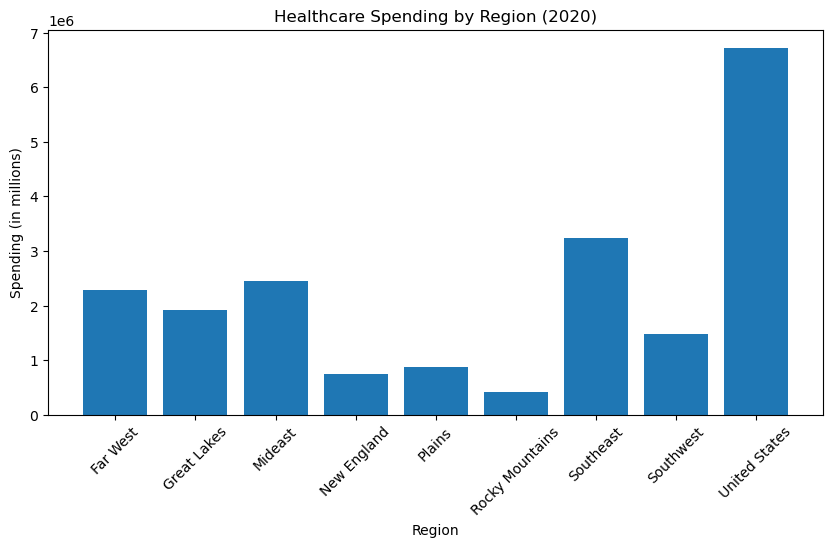

       Region_Name  Average_Annual_Percent_Growth
5  Rocky Mountains                       6.760000
0         Far West                       6.758571
7        Southwest                       6.558000
6        Southeast                       6.209231
8    United States                       5.980000
4           Plains                       5.923750
3      New England                       5.735714
2          Mideast                       5.720000
1      Great Lakes                       5.448333


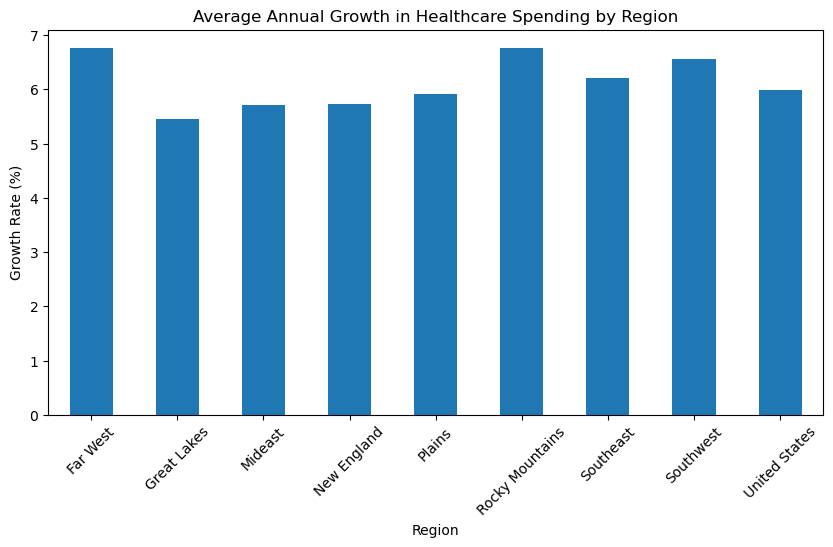

                 Y2020_medicare  Y2020_medicaid
Region_Name                                    
Far West                 482297          465427
Great Lakes              438541          333986
Mideast                  486356          501630
New England              147621          136729
Plains                   187129          138205
Rocky Mountains           84815           68660
Southeast                843667          458505
Southwest                347657          244499
United States           1509044         1173829


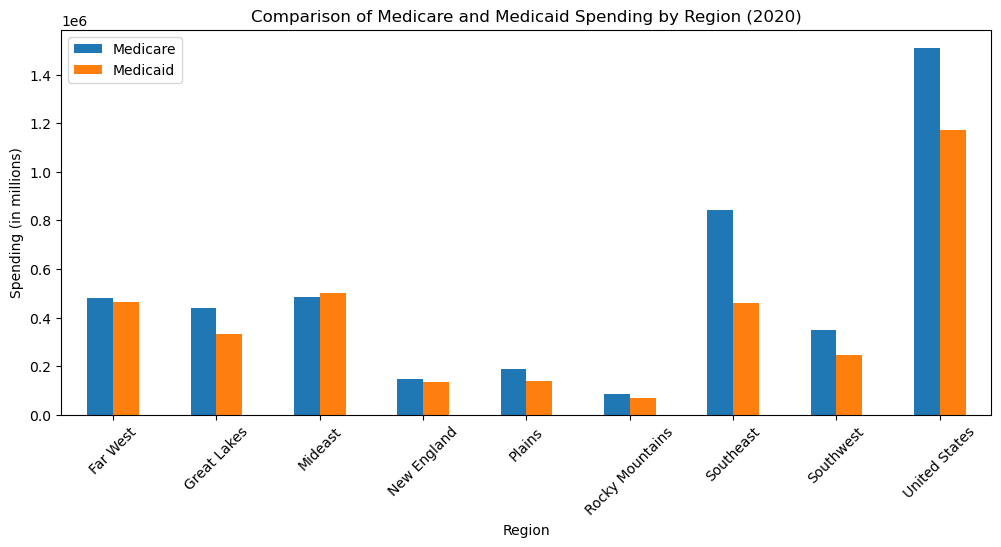

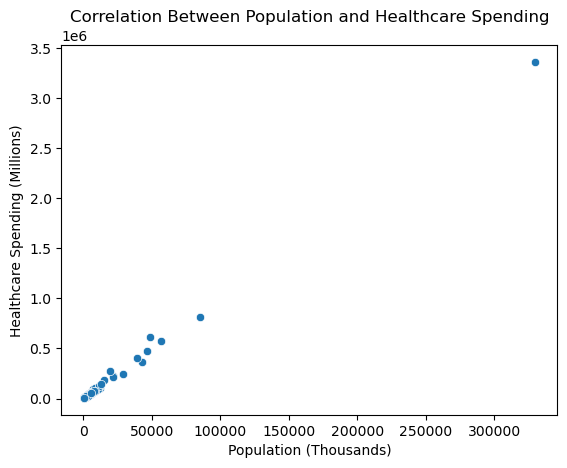

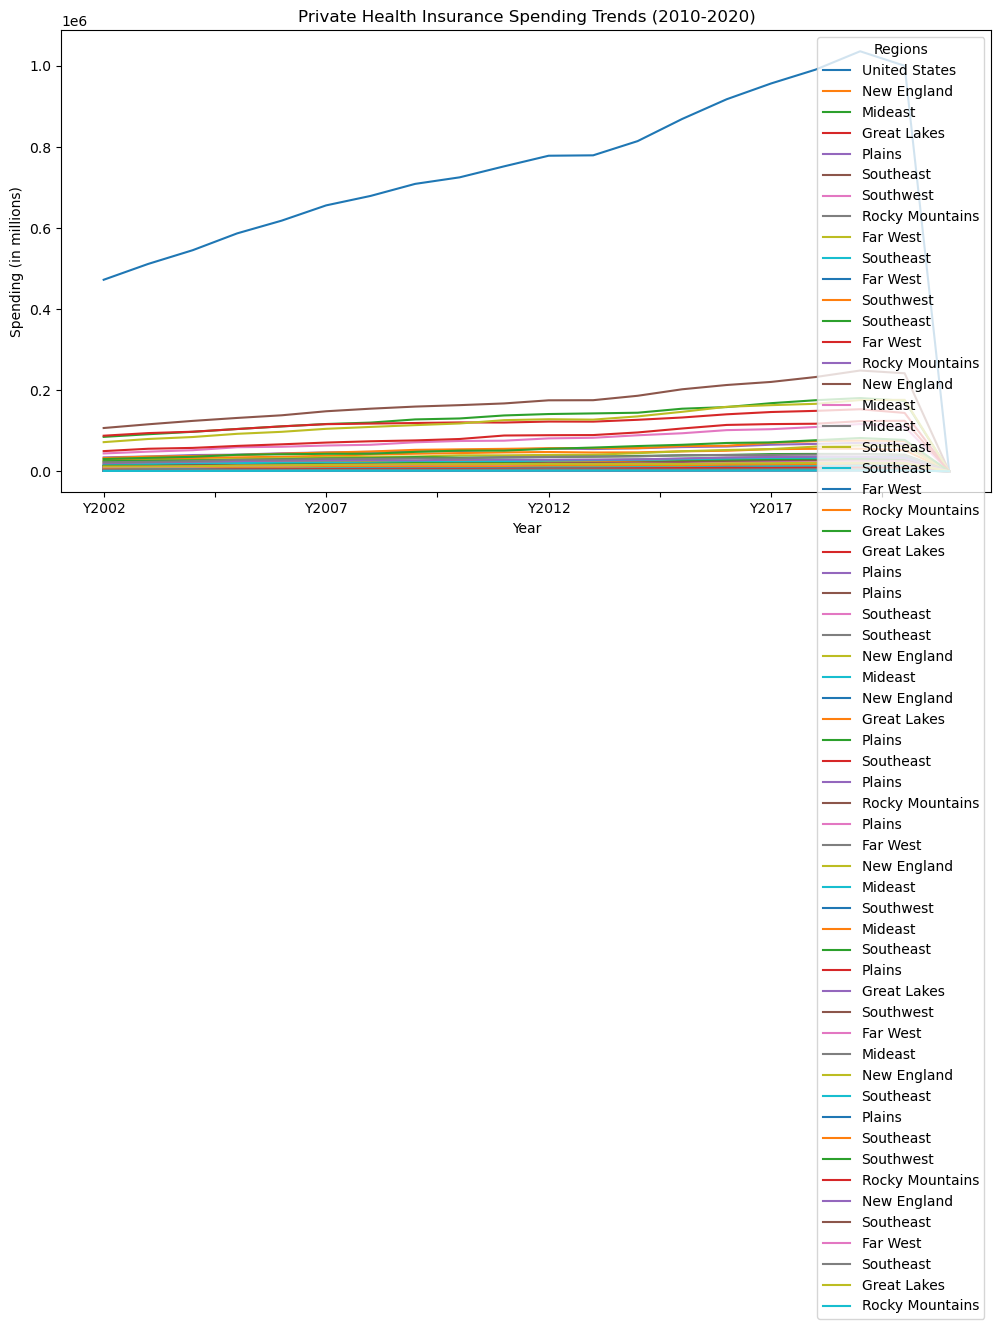

Key findings saved as CSV files.


In [143]:
#load datasets
df_spending = pd.read_csv('US_AGGREGATE20.CSV')
df_per_capita = pd.read_csv('US_PER_CAPITA20.CSV')
df_population = pd.read_csv('US_POPULATION20.CSV')
df_medicare = pd.read_csv('MEDICARE_AGGREGATE20.CSV')
df_medicaid = pd.read_csv('MEDICAID_AGGREGATE20.CSV')
df_private_health = pd.read_csv('PHI_AGGREGATE20.CSV')

#Display first 5 rows 
print("Spending Data:")
print(df_spending.head())

print ("PerCapita Spending Data:")
print(df_per_capita.head())

print ("Population Data:")
print(df_population.head())

print ("Medicare Data:")
print(df_medicare.head())

print("Medicaid Data:")
print(df_medicaid.head())

print("Private Healthcare:")
print(df_private_health.head())

#Overview of each dataset 

print(df_spending.info())
print(df_per_capita.info())
print(df_population.info())
print(df_medicare.info())
print(df_medicaid.info())
print(df_private_health.info())

#Check for missing values
print("Missing values per column in Spending Data:")
print(df_spending.isnull().sum())

print("Missing values per column in Per Capita Spending Data:")
print(df_per_capita.isnull().sum())

print("\nMissing values per column in Population Data:")
print(df_population.isnull().sum())

print("\nMissing values per column in Medicare Data:")
print(df_medicare.isnull().sum())

print("\nMissing values per column in Medicaid Data:")
print(df_medicaid.isnull().sum())

print("\nMissing values per column in Private Health Data:")
print(df_private_health.isnull().sum())

#Drop missing values
df_spending.drop(columns=['State_Name'], inplace=True)
df_per_capita.drop(columns=['State_Name'], inplace=True)
df_population.drop(columns=['State_Name'], inplace=True)
df_medicare.drop(columns=['State_Name'], inplace=True)
df_medicaid.drop(columns=['State_Name'], inplace=True)
df_private_health.drop(columns=['State_Name'], inplace=True)
df_medicaid.loc[:, 'Average_Annual_Percent_Growth'] = df_medicaid['Average_Annual_Percent_Growth'].fillna(df_medicaid['Average_Annual_Percent_Growth'].mean())

print("State_Name column dropped from all datasets.")


# Verify missing values in other columns
print("Missing values after filling:")
print(df_medicaid['Average_Annual_Percent_Growth'].isnull().sum())  # Only check columns that exist

# Save Cleaned Data
df_spending.to_csv('cleaned_spending_data.csv', index=False)
df_per_capita.to_csv('cleaned_per_capita_data.csv', index=False)
df_population.to_csv('cleaned_population_data.csv', index=False)
df_medicare.to_csv('cleaned_medicare_data.csv', index=False)
df_medicaid.to_csv('cleaned_medicaid_data.csv', index=False)
df_private_health.to_csv('cleaned_private_health_data.csv', index=False)

print("Cleaned data saved successfully!")

#Load Cleaned Data

df_spending = pd.read_csv('cleaned_spending_data.csv')
df_per_capita = pd.read_csv('cleaned_per_capita_data.csv')
df_population = pd.read_csv('cleaned_population_data.csv')
df_medicare = pd.read_csv('cleaned_medicare_data.csv')
df_medicaid = pd.read_csv('cleaned_medicaid_data.csv')
df_private_health = pd.read_csv('cleaned_private_health_data.csv')

print("Cleaned data loaded successfully!")

#Exploratory Data Analysis
print(df_spending['Region_Name'].unique())
region_spending_summary = df_spending.groupby('Region_Name')['Y2020'].sum().reset_index()
print(region_spending_summary)

#Visulaize Healthcare spending by region
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(region_spending_summary['Region_Name'], region_spending_summary['Y2020'])
plt.title('Healthcare Spending by Region (2020)')
plt.ylabel('Spending (in millions)')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.show()

#Growth rate by Region
region_growth_summary = df_spending.groupby('Region_Name')['Average_Annual_Percent_Growth'].mean().reset_index()
print(region_growth_summary.sort_values(by='Average_Annual_Percent_Growth', ascending=False))

region_growth_summary.plot(kind='bar', x='Region_Name', y='Average_Annual_Percent_Growth', legend=False, figsize=(10,5))
plt.title('Average Annual Growth in Healthcare Spending by Region')
plt.ylabel('Growth Rate (%)')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.show()

#Medicare vs Medicaid Spending Trends
medicare_vs_medicaid = df_medicare[['Region_Name', 'Y2020']].groupby('Region_Name').sum().merge(
    df_medicaid[['Region_Name', 'Y2020']].groupby('Region_Name').sum(),
    on='Region_Name',
    suffixes=('_medicare', '_medicaid')
)

print(medicare_vs_medicaid)


medicare_vs_medicaid.plot(kind='bar', figsize=(12, 5))
plt.title('Comparison of Medicare and Medicaid Spending by Region (2020)')
plt.ylabel('Spending (in millions)')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.legend(['Medicare', 'Medicaid'])
plt.show()


#Correlation between Population and Spending

import seaborn as sns

sns.scatterplot(x=df_population['Y2020'], y=df_spending['Y2020'])
plt.xlabel('Population (Thousands)')
plt.ylabel('Healthcare Spending (Millions)')
plt.title('Correlation Between Population and Healthcare Spending')
plt.show()

#Private Health Insurance Spending
df_private_health.set_index('Region_Name').T.iloc[5:].plot(figsize=(12, 6))
plt.title('Private Health Insurance Spending Trends (2010-2020)')
plt.ylabel('Spending (in millions)')
plt.xlabel('Year')
plt.legend(title='Regions')
plt.show()

region_spending_summary.to_csv('region_spending_summary.csv', index=False)
region_growth_summary.to_csv('region_growth_summary.csv', index=False)
medicare_vs_medicaid.to_csv('medicare_vs_medicaid_comparison.csv', index=False)

print("Key findings saved as CSV files.")
